AIceberg Assignment 2 - Badereddin Alhusni

Task 1 - Handling missing data from the dataset

In [35]:
#Importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#this is used to have diagrams show in jupyter notebook
%matplotlib inline


In [36]:
#Reading in the data
df = pd.read_csv('Diabetes.csv')

#Looking at our data, we are working with 9 columns and 700+ rows of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [37]:
#We are able to see how the csv is structured and we can see that we have a alot of missing values
#especially in the Serum_insulin
df.head(10)

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [38]:
#Looking closer at our data, we can see that almost half of our Serum_Insulin
#Looking closer we can see some pregnansies are above 9 (more than 9 months pregnancies are usually abnormal) and might
#be an indication of false data that we can potentially drop
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

<Axes: >

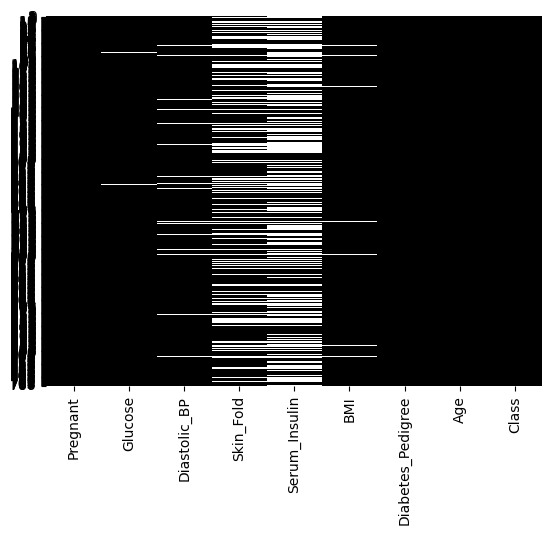

In [39]:
#We have also use Seaborn library to visualize our missing data
#We can observe that any of the white lines are missing data
#Two ways of cleaning our missing data 1) By dropping the missing values 2) by finding the mean and replacing the missing value
#With the mean

#Note: It is not always a good idea to just get the mean and replace all missing values with the mean, there are alot of factors
#that might take into play, for example pregnant women at month 6 will have different readings when it comes to Glucose, Skin_fold
# and Diastolic_BP levels than a women who is in month 2, consulting a professional is best to understand
# the data we are working with and their relationship between each other
# What we are working with, to acheive the most accurate results.
sns.heatmap(df.isnull(),yticklabels=True,cbar=False,cmap='gist_gray')

<Axes: >

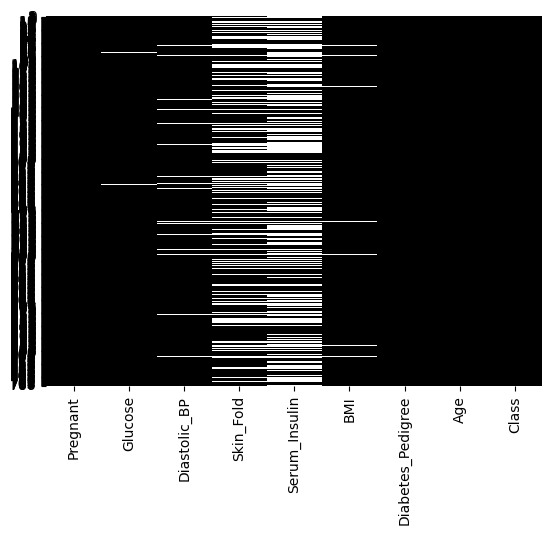

In [40]:
sns.heatmap(df.isnull(),yticklabels=True,cbar=False,cmap='gist_gray')

In [41]:
#This will help us see that we have pregnancies above 9, pregnancies that reach 10, 11 even 4 of them are being above 14 which
#is not normal at all.
#with some research, diabetic women can effect the duration of the pregnancy, mostly having a pre-term birth not post-term birth
#a "FULL" pregnancy term is 40 weeks ~ 10 months, so with this information it is safe to drop any pregnancies above 10 months old
df['Pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnant, dtype: int64

In [42]:
df = df[df['Pregnant'] <= 10]

#Comparing our results after dropping the pregnancies above 10 months we can see "Serum_Inslulin" missing values also dropped
#significantly 
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          33
Skin_Fold            217
Serum_Insulin        356
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [43]:
df['Pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
Name: Pregnant, dtype: int64

Now we do need to do more research to understand our data more.

__________________________
according to "https://www.cdc.gov/diabetes/basics/getting-tested.html"
if your fasting blood glucose level is above 126, then you are considered diabetic

__________________________
As for BMI levels, anything that is above 30 BMI is considered obese, there is NO set value but there is correlation
that diabetes develop as the person is more obese.
__________________________
According to "https://legionathletics.com/body-fat-calipers/#7site-jacksonpollock-skinfold-method" 
Skin_Fold is used to determine someone's fat precentage by using this formula. Using 3-site Jackson-Pollock Skinfold Method
we can use the following formula:

Body Density = 1.0994921 – (0.0009929 x sum of skinfolds) + (0.0000023 x square of the sum of skinfolds) – (0.0001392 x age)
Body Fat Percentage = (495 / Body Density) – 450
__________________________
Diastolic_BP measures the pressure in your blood vessels between heartbeats, when your heart is resting.
but it is NOT a direct factor if someone is obese, it can be cause due to exhausteness, stress and many more

however, hypertension can be seen in diabetic people more than others, but not a direction correlation
__________________________
Serum_Insulin can be correlated to diabetes 2, as our glucose goes higher, our insulin goes higher to keep our glucose in a healthy range

after looking at our data I can rank from most important to least important columns
(Most to Least important):
1) Glucose
2) BMI
3) Serum_Insulin
4) Diastolic_BP
5) Pregnant
6) Skin_Fold

In [44]:
df[df['Glucose'].isna()]

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [45]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [46]:
#We can continue on cleaning this data by removing rows that have 3 or more missing values in a row, for example, missing
#BMI, Skin_Fold and Serum_Insulin might be a row that does not help us determine if someone is diabetic or not due to not much information
nan_count = df.isna().sum(axis=1)
rows_with_3_or_more_nans = df[nan_count >= 3]
print(rows_with_3_or_more_nans)

     Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
7          10    115.0           NaN        NaN            NaN  35.3   
9           8    125.0          96.0        NaN            NaN   NaN   
15          7    100.0           NaN        NaN            NaN  30.0   
49          7    105.0           NaN        NaN            NaN   NaN   
60          2     84.0           NaN        NaN            NaN   NaN   
78          0    131.0           NaN        NaN            NaN  43.2   
81          2     74.0           NaN        NaN            NaN   NaN   
222         7    119.0           NaN        NaN            NaN  25.2   
261         3    141.0           NaN        NaN            NaN  30.0   
266         0    138.0           NaN        NaN            NaN  36.3   
269         2    146.0           NaN        NaN            NaN  27.5   
300         0    167.0           NaN        NaN            NaN  32.3   
332         1    180.0           NaN        NaN            NaN  

In [47]:
#Dropping rows that had 3 or more values N/A in a row.
#We will also be dropping all rows that have both Glocuse and Serum Insulin N/A as those 2 are good indications to predict
#if someone is diabetic or not as an increase in glocuse also increase insulin production
df.dropna(thresh=df.shape[1]-2, inplace=True)
df.dropna(subset=['Glucose', 'Serum_Insulin'], how='all', inplace=True)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           696 non-null    int64  
 1   Glucose            695 non-null    float64
 2   Diastolic_BP       695 non-null    float64
 3   Skin_Fold          513 non-null    float64
 4   Serum_Insulin      378 non-null    float64
 5   BMI                694 non-null    float64
 6   Diabetes_Pedigree  696 non-null    float64
 7   Age                696 non-null    int64  
 8   Class              696 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.4 KB


In [49]:
#Checking if there are any duplications.
df[df.duplicated].sum()

Pregnant             0.0
Glucose              0.0
Diastolic_BP         0.0
Skin_Fold            0.0
Serum_Insulin        0.0
BMI                  0.0
Diabetes_Pedigree    0.0
Age                  0.0
Class                0.0
dtype: float64

In [50]:
#Since I will be providing 2 different datasets, we can have 2 approaches
#First approach is by deleting all rows that have any N/A values in any row 
#Second approach is by getting the mean value to fill in all of missing data

#Dropping all rows that have any N/A
df_approach_one = df.dropna(axis=0, how='any')

#Saving dataframe into a csv file
df_approach_one.to_csv('Diabetes_approach_one.csv',index=False)

df_approach_one

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


<Axes: >

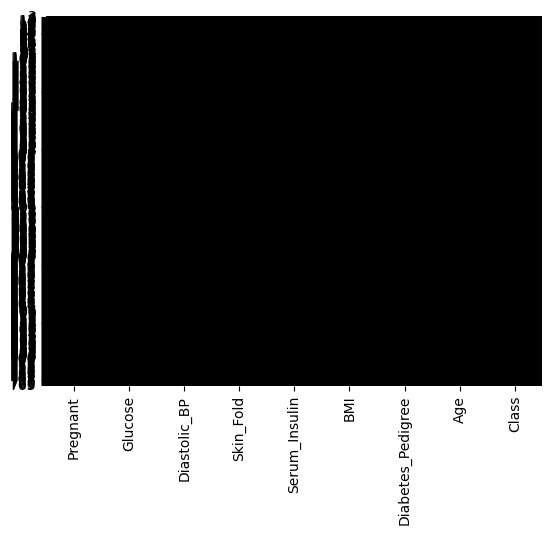

In [51]:
#By doing approach one, we lose half of the data
#As we can see, we do not have any missing values of this data set and we can use that to train, but we lost half of the data we have
sns.heatmap(df_approach_one.isnull(),yticklabels=True,cbar=False,cmap='gist_gray')

For approach 2, we can fill in all the missing values by the mean, now since we have done research and found out that
Glucose and Serum_Insulin effect each other (As Glucose increases the serum_Insulin increases too)

The way we can approach this, is by splitting up the Glucose into sections and then taking the mean of their insulin and filling the mean in rows that are missing values

Sections:   1) Normal (99.0 and lower) 
            2) Prediabetes (100-125) 
            3) Diabetes (126 and above)

In [52]:
#Variables calculating mean based on the sections we made depending on the Glucose levels for each person
normal_glucose_level_mean = df.loc[df['Glucose'] <= 99, 'Serum_Insulin'].mean()
prediabetes_glucose_level_mean = df.loc[(df['Glucose'] >= 100) & (df['Glucose'] <= 125), 'Serum_Insulin'].mean()
diabetes_glucose_level_mean = df.loc[df['Glucose'] >= 126, 'Serum_Insulin'].mean()

#Copying to a new variable for approach two data frame
df_approach_two = df.copy()

#Replace N/A values in Serum_Insulin with their respective mean 
df_approach_two.loc[(df['Glucose'] <= 99) & df['Serum_Insulin'].isna(), 'Serum_Insulin'] = df.loc[(df['Glucose'] <= 99) & df['Serum_Insulin'].isna(), 'Serum_Insulin'].fillna(normal_glucose_level_mean)
df_approach_two.loc[(df['Glucose'] >= 100) & (df['Glucose'] <= 125) & df['Serum_Insulin'].isna(), 'Serum_Insulin'] = df.loc[(df['Glucose'] >= 100) & (df['Glucose'] <= 125) & df['Serum_Insulin'].isna(), 'Serum_Insulin'].fillna(prediabetes_glucose_level_mean)
df_approach_two.loc[(df['Glucose'] >= 126) & df['Serum_Insulin'].isna(), 'Serum_Insulin'] = df.loc[(df['Glucose'] >= 126) & df['Serum_Insulin'].isna(), 'Serum_Insulin'].fillna(diabetes_glucose_level_mean)

#Saving dataframe into a csv file
df_approach_two.to_csv('Diabetes_approach_two.csv',index=False)
df_approach_two


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,228.980132,33.6,0.627,50,1
1,1,85.0,66.0,29.0,72.670000,26.6,0.351,31,0
2,8,183.0,64.0,NaN,228.980132,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.0,134.920635,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,NaN,228.980132,30.1,0.349,47,1


In [53]:
df_approach_two = pd.read_csv('Diabetes_approach_two.csv')

In [54]:
df_approach_two.corr()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
Pregnant,1.000000,0.149958,0.186711,0.069594,0.088181,-0.037635,-0.032821,0.543482,0.209352
Glucose,0.149958,1.000000,0.218168,0.230505,0.651437,0.224337,0.127935,0.272673,0.495891
Diastolic_BP,0.186711,0.218168,1.000000,0.222051,0.139702,0.283858,-0.002575,0.313098,0.162909
Skin_Fold,0.069594,0.230505,0.222051,1.000000,0.208200,0.646773,0.119789,0.161045,0.264916
Serum_Insulin,0.088181,0.651437,0.139702,0.208200,1.000000,0.220421,0.116076,0.210876,0.322559
BMI,-0.037635,0.224337,0.283858,0.646773,0.220421,1.000000,0.152982,0.008173,0.297549
Diabetes_Pedigree,-0.032821,0.127935,-0.002575,0.119789,0.116076,0.152982,1.000000,0.020343,0.170891
Age,0.543482,0.272673,0.313098,0.161045,0.210876,0.008173,0.020343,1.000000,0.241673
Class,0.209352,0.495891,0.162909,0.264916,0.322559,0.297549,0.170891,0.241673,1.000000


<Axes: >

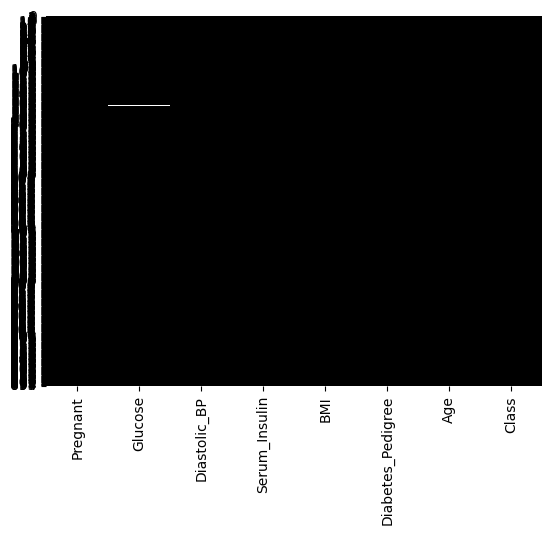

In [55]:
#Heatmap to visualize values that are missing, as skin_Fold does not directly relate to diabetes but how obese someone is,
#I can go ahead and drop that column since I already know the BMI, and drop the single N/A row for glucose

df_approach_two = df_approach_two.drop('Skin_Fold', axis=1)
sns.heatmap(df_approach_two.isnull(),yticklabels=True,cbar=False,cmap='gist_gray')


In [56]:
# df_approach_two = df_approach_two.dropna(subset=['Glucose', ''])
nan_counts = df_approach_two.isna().sum()
nan_counts

Pregnant             0
Glucose              1
Diastolic_BP         1
Serum_Insulin        0
BMI                  2
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64

In [57]:
df_approach_two = df_approach_two.dropna(subset=['Glucose', 'Diastolic_BP', 'BMI'])
nan_counts = df_approach_two.isna().sum()
nan_counts

Pregnant             0
Glucose              0
Diastolic_BP         0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64

Looking at this, we have 2 different datasets that we can work with, 
one where we deleted all the rows that are missing data
and one that we imputated by looking closer to the values and getting the mean to fill those data

I will be training 3 models on these 2 data sets, this is going to a supervised learning as we know what the outcome is (Class parameter)

1) Logistic Regression is a learning method for classification
2)

In [58]:
df_approach_two

,Pregnant,Glucose,Diastolic_BP,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,228.980132,33.6,0.627,50,1
1,1,85.0,66.0,72.670000,26.6,0.351,31,0
2,8,183.0,64.0,228.980132,23.3,0.672,32,1
3,1,89.0,66.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
691,10,101.0,76.0,180.000000,32.9,0.171,63,0
692,2,122.0,70.0,134.920635,36.8,0.340,27,0
693,5,121.0,72.0,112.000000,26.2,0.245,30,0
694,1,126.0,60.0,228.980132,30.1,0.349,47,1


<Axes: >

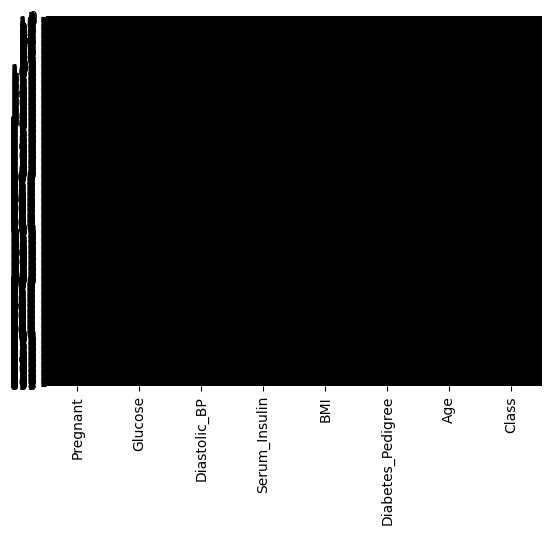

In [59]:
sns.heatmap(df_approach_two.isnull(),yticklabels=True,cbar=False,cmap='gist_gray')

In [60]:
#For data frame one
X1 = df_approach_one.drop('Class',axis=1)
Y1 = df_approach_one['Class']

#For dataframe two
X2 = df_approach_two.drop('Class', axis=1)
Y2 = df_approach_two['Class']

In [61]:
#importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

logRegression_data_one = LogisticRegression()
logRegression_data_two = LogisticRegression()
#Dataframe one
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.33, random_state=42)
#Dataframe two
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.33, random_state=42)

#Fitting dataframe one
logRegression_data_one.fit(X1_train,y1_train)
#Fitting dataframe two
logRegression_data_two.fit(X2_train,y2_train)

lg_prediction_one = logRegression_data_one.predict(X1_test)
lg_prediction_two = logRegression_data_two.predict(X2_test)

lg_report_one = classification_report(y1_test,lg_prediction_one)
lg_report_two = classification_report(y2_test,lg_prediction_two)

#Precision of model getting is correctly for data frame one
lg_precision_one_class_one = precision_score(y1_test,lg_prediction_one).round(2)
lg_precision_one_class_zero = precision_score(y1_test,lg_prediction_one, pos_label=0).round(2)

#Precision of model getting is correctly for data frame two
lg_precision_two_class_one = precision_score(y2_test,lg_prediction_two).round(2)
lg_precision_two_class_zero = precision_score(y2_test,lg_prediction_two, pos_label=0).round(2)

lg_acc_one = accuracy_score(y1_test, lg_prediction_one)
lg_acc_two = accuracy_score(y2_test, lg_prediction_two)

print(lg_report_one)
print(lg_report_two)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        92
           1       0.64      0.55      0.59        33

    accuracy                           0.80       125
   macro avg       0.74      0.72      0.73       125
weighted avg       0.79      0.80      0.79       125

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       147
           1       0.75      0.57      0.65        82

    accuracy                           0.78       229
   macro avg       0.77      0.73      0.74       229
weighted avg       0.77      0.78      0.77       229



/Users/baderalhusni/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree_one = DecisionTreeClassifier()
dtree_two = DecisionTreeClassifier()

dtree_one.fit(X1_train,y1_train)
dtree_two.fit(X2_train,y2_train)

dtree_prediction_one = dtree_one.predict(X1_test)
dtree_prediction_two = dtree_two.predict(X2_test)

#assigning report to a variable
dtree_report_one = classification_report(y1_test,dtree_prediction_one)
dtree_report_two = classification_report(y2_test,dtree_prediction_two)

#Precision of model getting is correctly for data frame one
dtree_precision_one_class_one = precision_score(y1_test,dtree_prediction_one).round(2)
dtree_precision_one_class_zero = precision_score(y1_test,dtree_prediction_one, pos_label=0).round(2)

#Precision of model getting is correctly for data frame two
dtree_precision_two_class_one = precision_score(y2_test,dtree_prediction_two).round(2)
dtree_precision_two_class_zero = precision_score(y2_test,dtree_prediction_two, pos_label=0).round(2)

dtree_acc_one = accuracy_score(y1_test, dtree_prediction_one)
dtree_acc_two = accuracy_score(y2_test, dtree_prediction_two)

#Results of training Decision tree
print("Prediction for set one:",len(df_approach_one))
print(dtree_report_one)
print("\n")
print("Prediction for set two",len(df_approach_two))
print(dtree_report_two)

Prediction for set one: 376
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        92
           1       0.44      0.52      0.47        33

    accuracy                           0.70       125
   macro avg       0.62      0.64      0.63       125
weighted avg       0.71      0.70      0.70       125



Prediction for set two 692
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       147
           1       0.60      0.59      0.59        82

    accuracy                           0.71       229
   macro avg       0.69      0.68      0.68       229
weighted avg       0.71      0.71      0.71       229



In [63]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc_one = RandomForestClassifier(n_estimators=100)
rfc_two = RandomForestClassifier(n_estimators=100)

rfc_one.fit(X1_train,y1_train)
rfc_two.fit(X2_train,y2_train)

rfc_prediction_one = rfc_one.predict(X1_test)
rfc_prediction_two = rfc_two.predict(X2_test)

#reports to show output of the model
rcf_report_one = classification_report(y1_test,rfc_prediction_one)
rcf_report_two = classification_report(y2_test,rfc_prediction_two)

#Precision of model getting is correctly for data frame one
rfc_precision_one_class_one = precision_score(y1_test,rfc_prediction_one).round(2)
rfc_precision_one_class_zero = precision_score(y1_test,rfc_prediction_one, pos_label=0).round(2)

rfc_acc_one = accuracy_score(y1_test, rfc_prediction_one)
rfc_acc_two = accuracy_score(y2_test, rfc_prediction_two)

#Precision of model getting is correctly for data frame two
rfc_precision_two_class_one = precision_score(y2_test,rfc_prediction_two).round(2)
rfc_precision_two_class_zero = precision_score(y2_test,rfc_prediction_two, pos_label=0).round(2)

print("Prediction for set one")
print(rcf_report_one)
print("\n")
print("Prediction for set two")
print(rcf_report_two)

Prediction for set one
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        92
           1       0.62      0.48      0.54        33

    accuracy                           0.78       125
   macro avg       0.72      0.69      0.70       125
weighted avg       0.77      0.78      0.78       125



Prediction for set two
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       147
           1       0.70      0.61      0.65        82

    accuracy                           0.77       229
   macro avg       0.75      0.73      0.74       229
weighted avg       0.76      0.77      0.76       229



Text(0.5, 1.0, 'Model Metrics for Diabetic Prediction')

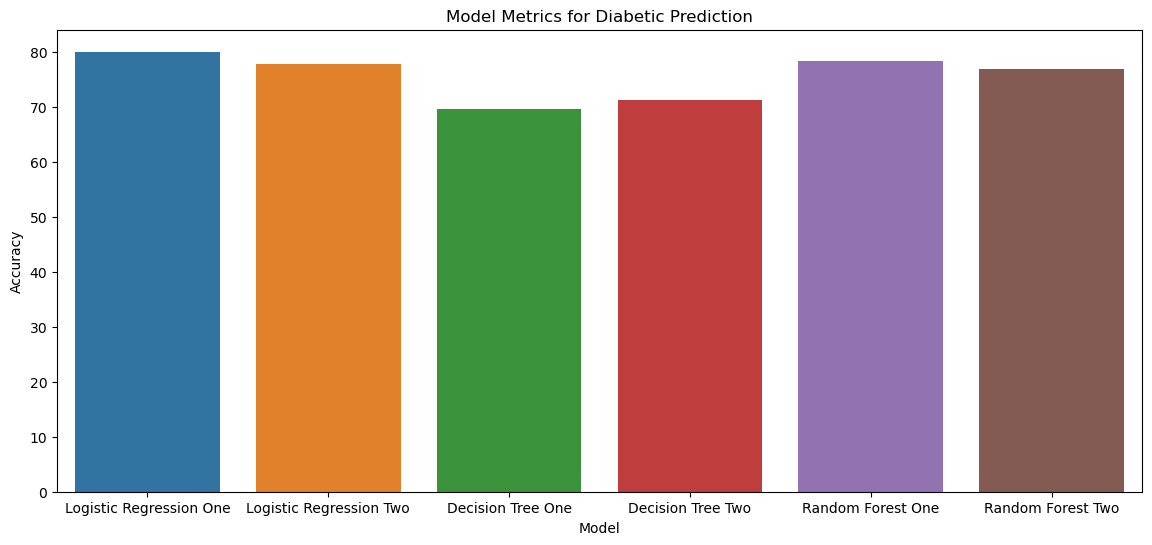

In [64]:
data = {
    'Logistic Regression One': {'Class 1': lg_acc_one*100},
    'Logistic Regression Two': {'Class 1': lg_acc_two*100},
    'Decision Tree One': {'Class 1': dtree_acc_one*100},
    'Decision Tree Two': {'Class 1': dtree_acc_two*100},
    'Random Forest One': {'Class 1': rfc_acc_one*100},
    'Random Forest Two': {'Class 1': rfc_acc_two*100},
}

data_df = pd.DataFrame(data)
data_df

#Plot configurations
plt.figure(figsize=(14, 6))
sns.barplot(data=data_df)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Model Metrics for Diabetic Prediction")

For context: any model that ends with "One" has approximatly 390-400 rows of data while the models the end with "Two" has 690-700 rows of data, that is due to our data cleaning technique we did.

additionally we can see the difference when it comes to accuracy from decision tree one and decision tree two.
we can give some insights that more data in a dataset does not always lead to better results. the additional data we have might be bad quality data. here are some of the reasons of why we can see a drop in accuracy when it comes to the 2nd dataset on all 3 models

1) Overfitting: our models might be overfitting as their are more noise in the training data
2) Data Quality: The extra data we have might not be the best quality (for example the mean we got for the missing values) - since we removed all of the missing value entries, we cleaned it and that might have played a better role at higher accuracy
3) Bias = there is Bias measurements for the data that was missing, which leads to worse accuracy

In [65]:
data_df

,Logistic Regression One,Logistic Regression Two,Decision Tree One,Decision Tree Two,Random Forest One,Random Forest Two
Class 1,80.0,77.729258,69.6,71.179039,78.4,76.855895


In [66]:
import xgboost as xgb

# Create a XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=150, learning_rate=0.27, random_state=100)

# Fit the model on the training data
xgb_one = xgb_classifier.fit(X1_train, y1_train)
# xgb_two = xgb_classifier.fit(X2_train, y2_train)

# Make predictions on the test data
xgb_prediction_one = xgb_classifier.predict(X1_test)
# xgb_prediction_two = xgb_classifier.predict(X2_test)

# Calculate the accuracy
accuracy_xgb_one = accuracy_score(y1_test, xgb_prediction_one)
# accuracy_xgb_two = accuracy_score(y2_test, xgb_prediction_two)
print("XGBoost Classifier Accuracy One:", accuracy_xgb_one)
# print("XGBoost Classifier Accuracy Two:", accuracy_xgb_two)

XGBoost Classifier Accuracy One: 0.776


I have implemented 2 ensemble learning technique to see what kind of results I can get
1) XGBoost
    It uses Decision tree as a base learner
2) Stacking 
    Using stacking can help obtain a better overall performance, as we can utilize each classifier strength rather than having
    a single model results, it reduces the variance and overall overfitting of the model

In [67]:
from sklearn.ensemble import StackingClassifier

base_learners = [
    ('rfc', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dtree', DecisionTreeClassifier(random_state=42)),
    ('lg', LogisticRegression(max_iter=900))
]
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

stacking_classifier.fit(X1_train,y1_train)

stacking_prediction = stacking_classifier.predict(X1_test)

accuracy_stacking = accuracy_score(y1_test, stacking_prediction)
accuracy_stacking

0.792

Text(0.5, 1.0, 'Model Metrics for Diabetic Prediction')

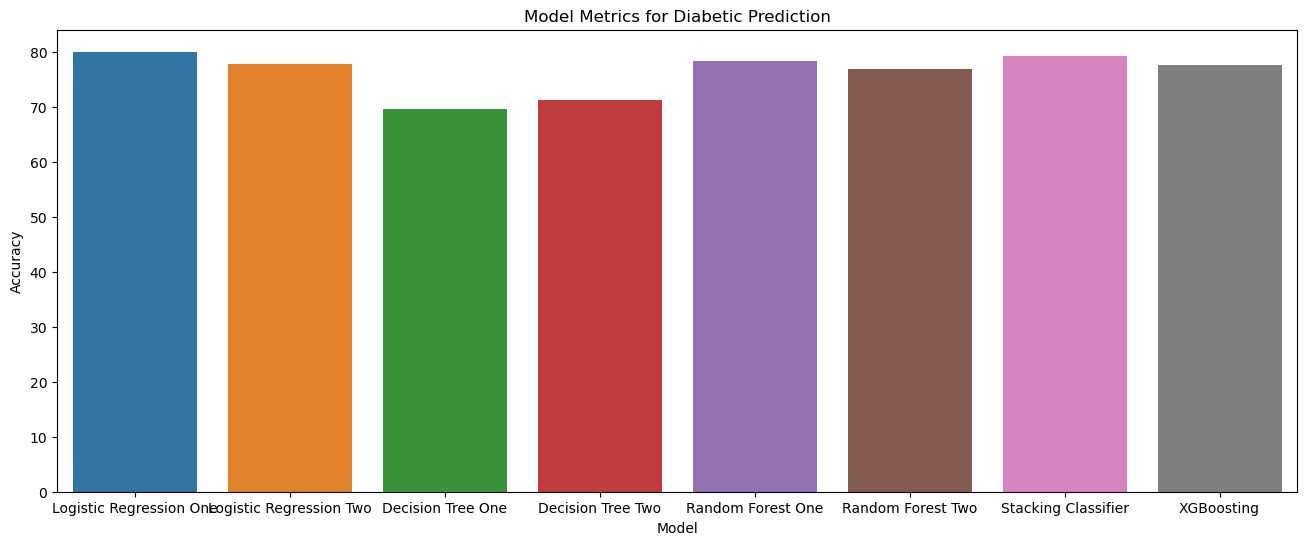

In [68]:
data = {
    'Logistic Regression One': {'Class 1': lg_acc_one*100},
    'Logistic Regression Two': {'Class 1': lg_acc_two*100},
    'Decision Tree One': {'Class 1': dtree_acc_one*100},
    'Decision Tree Two': {'Class 1': dtree_acc_two*100},
    'Random Forest One': {'Class 1': rfc_acc_one*100},
    'Random Forest Two': {'Class 1': rfc_acc_two*100},
    'Stacking Classifier' : {'Class 1': accuracy_stacking*100},
    'XGBoosting' : {'Class 1' : accuracy_xgb_one*100}
}

data_df = pd.DataFrame(data)
data_df

#Plot configurations
plt.figure(figsize=(16, 6))
sns.barplot(data=data_df)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Model Metrics for Diabetic Prediction")

We might come up with a question of why does random forest one compete with stacking Classifier, and that is because random forest is also an ensemble learning technique

Deploying model into AWS Sagemaker

In [72]:
# from fastapi import FastAPI, HTTPException
# from pydantic import BaseModel
# from typing import List
# import joblib
# import numpy as np
# import nest_asyncio
# import uvicorn

# # Apply nest_asyncio
# nest_asyncio.apply()

# app = FastAPI()

# # Load models
# log_reg_model_one = joblib.load('log_reg_model_one.pkl')
# log_reg_model_two = joblib.load('log_reg_model_two.pkl')
# dtree_model_one = joblib.load('dtree_model_one.pkl')
# dtree_model_two = joblib.load('dtree_model_two.pkl')
# rfc_model_one = joblib.load('rfc_model_one.pkl')
# rfc_model_two = joblib.load('rfc_model_two.pkl')

# # Define Pydantic models for request bodies
# class Features(BaseModel):
#     features: List[float]

# @app.post("/predict/logistic_regression/{model_id}")
# def predict_logistic_regression(model_id: int, features: Features):
#     if model_id == 1:
#         model = log_reg_model_one
#     elif model_id == 2:
#         model = log_reg_model_two
#     else:
#         raise HTTPException(status_code=404, detail="Model not found")
    
#     prediction = model.predict([features.features])
#     return {"prediction": int(prediction[0])}

# @app.post("/predict/decision_tree/{model_id}")
# def predict_decision_tree(model_id: int, features: Features):
#     if model_id == 1:
#         model = dtree_model_one
#     elif model_id == 2:
#         model = dtree_model_two
#     else:
#         raise HTTPException(status_code=404, detail="Model not found")
    
#     prediction = model.predict([features.features])
#     return {"prediction": int(prediction[0])}

# @app.post("/predict/random_forest/{model_id}")
# def predict_random_forest(model_id: int, features: Features):
#     if model_id == 1:
#         model = rfc_model_one
#     elif model_id == 2:
#         model = rfc_model_two
#     else:
#         raise HTTPException(status_code=404, detail="Model not found")
    
#     prediction = model.predict([features.features])
#     return {"prediction": int(prediction[0])}

# # Start the server within Jupyter notebook
# config = uvicorn.Config(app, host="0.0.0.0", port=8000, log_level="info")
# server = uvicorn.Server(config=config)

# # Run the server
# server.run()


INFO:     Started server process [1490]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:59686 - "POST /predict/logistic_regression/1 HTTP/1.1" 500 Internal Server Error


/Users/baderalhusni/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/Users/baderalhusni/anaconda3/lib/python3.10/site-packages/uvicorn/protocols/http/httptools_impl.py", line 411, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "/Users/baderalhusni/anaconda3/lib/python3.10/site-packages/uvicorn/middleware/proxy_headers.py", line 69, in __call__
    return await self.app(scope, receive, send)
  File "/Users/baderalhusni/anaconda3/lib/python3.10/site-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/Users/baderalhusni/anaconda3/lib/python3.10/site-packages/starlette/applications.py", line 123, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/Users/baderalh

INFO:     127.0.0.1:59699 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:59699 - "GET /favicon.ico HTTP/1.1" 404 Not Found


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [1490]


KeyboardInterrupt: 